Gradient Descent가 어떤 것인지 보았고 cost function을 최소화 하는데 매우 효율적인 방법이라는 것을 알게 되었습니다. 하지만 이 방법의 한계는 cost function 이 U자 형태로 한쪽 방향으로 볼록한 모양이어야 적용 가능하다는 문제를 가지고 있습니다. 만약에 cost function이 제곱근에 비례하지 않거나 multi dimensional space에 표현 될 경우 구불구불한 모양이 될 수 있습니다. 이런 cost function 값에 simple한 Gradient Descent를 적용하게 되면 잘못된 weight값을 갖게 됩니다. 이 문제를 해결하기 위해 Stochastic Gradient Descent가 필요합니다.
일반적인 Gradient Descent는 Batch Gradient Descent로서 neural network안에 있는 모든 cost function값의 합을 가지고 적합한  weight를 찾고 이 과정을 반복합니다.  전체 bath를 가지고 같은 weight를 적용하게 됩니다. Stochastic Gradient Descent는 약간 다릅니다. Neural network안에 있는 dataset 의 row 하나 하나를 따로 cost function 값을 구하고 각각의 weight를 계산 하게 됩니다. 전체 batch 의 cost function 값을 합산해서  weight를 구하는 Batch Gradient Descent에 비해서 row 하나 하나의 cost function값을 구하고 각각의 row weight를 구하는 Stochastic Gradient는 어떤 장 단점을 가지고 있을까요?
첫 번째, Stochastic Gradient Descent는 Batch Gradient Descent 보다 global minimum 값을 더 쉽게 찾게 됩니다. 복잡한 cost function값을 보일 때 전체 값을 가지고 보면 local minimum 값을 global minimum 값으로 보게 될 수 있기 때문입니다. 하나 하나의 cost function  값들을 따로 보게 되면 이 값들의 변동 폭이 크기 때문에 overall global minimum을 구하기가 쉬워집니다.
두 번째는 속도입니다. Batch Gradient Descent처럼  전체를 보고 한번에 weight 계산하고 반복하는 것이   빠를 것 같지만 실제로 데이터 로딩 시간, 전체가 다 계산 되어질 때 까지 기다리는 시간 등을 따지면 Stochastic Gradient Descent가 더 빠르게 계산됩니다.
세 번째는 random입니다.  Batch Gradient Descent는 항상 전체 값을 가지고 계산 하기 때문에 반복되는 동일한  결과 값을 줄 수 있지만 Stochastic Gradient Descent는 random 계산을 하기 때문에 result가 달라질 수 있습니다.
이런 차이점을 Stochastic Gradient Descent가 가지고 있고 이런 장 단점을 가지고 mini- Batch Gradient Descent와 같은 방식들도 만들어 지고 있습니다.


In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
data_r = pd.read_csv('data/winequality/winequality-red.csv', sep=';')
data_w = pd.read_csv('data/winequality/winequality-white.csv', sep=';')

In [11]:
data_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [14]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
coef = [0.4, 0.8]

pres=[]
for row in dataset:
    yhat = predict(row, coef)
    print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))


Expected=1.000, Predicted=1.200
Expected=3.000, Predicted=2.000
Expected=3.000, Predicted=3.600
Expected=2.000, Predicted=2.800
Expected=5.000, Predicted=4.400


In [46]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    #데이터 개수만큼 가중치 만들기
    coef = [0.0 for i in range(len(train[0]))]
    
    history = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            # 예측값 구하기
            yhat = predict(row, coef)
            # 잔차구하기
            error = yhat - row[-1]
            # 잔체 제곱
            sum_error += error**2
            
            # 가중치 업데이트
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
                
            history.append(np.array(coef))
        #print(sum_error, coef)
    return coef, history

# Calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
l_rate = 0.001
n_epoch = 100000
coef, history = coefficients_sgd(dataset, l_rate, n_epoch)

In [47]:
coef

[0.39511142104515923, 0.8023065169123355]

In [48]:
history = np.vstack(history)

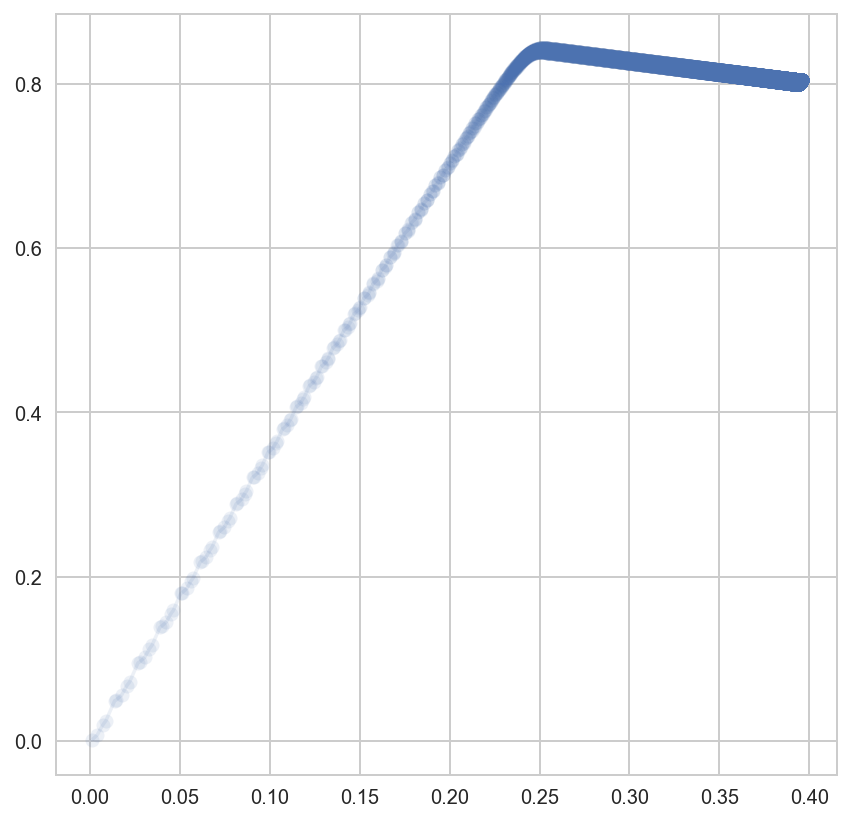

In [49]:
plt.figure(figsize=(7, 7))
plt.plot(history[:,0], history[:,1], 'o-', alpha=0.1)

In [50]:
from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()

In [53]:
def sgd(train):
    

array([ 0.03225343, -0.43717257, -0.14039799, -0.28942671, -1.43048995,
       -0.86109055, -0.95908022, -0.52824237, -0.18007786,  1.81894788,
       -1.50157469,  1.07524045, -0.53757079, -0.33654744, -0.69333384,
        0.18613021, -0.35285906, -0.59573347, -0.95284841,  1.37214258,
       -1.00148098,  0.59405599,  1.98893004, -0.84764818,  0.21276995,
       -0.86352344, -0.44574656, -1.08669572,  0.88578638, -0.39457786,
       -0.75808346,  0.21445342, -0.91772873,  1.18192126, -1.23456807,
        1.51028721,  0.36908201,  0.07800759,  0.92827925,  0.91180261,
        0.50541435,  0.39476163, -1.40727442,  1.33682587,  0.28914398,
        0.10784411, -0.48610801, -1.01412413, -0.99058644, -0.81726253,
        1.19533418,  1.39334529, -0.55307527,  1.31181742, -0.20875222,
        0.02615138,  0.03133165, -0.85845574, -0.09592554,  0.57347598,
        0.88361674, -0.27481173, -0.89590558, -1.02294529,  1.44454617,
        0.74268098, -0.55325354,  0.46630994,  0.81253433, -0.38